# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | sandy
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | patterson
Processing Record 9 of Set 1 | haiku-pauwela
Processing Record 10 of Set 1 | nabire
Processing Record 11 of Set 1 | turpan
Processing Record 12 of Set 1 | toga village
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | stepnogo

Processing Record 41 of Set 4 | polyarnyy
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | aromashevo
Processing Record 44 of Set 4 | alderetes
Processing Record 45 of Set 4 | musay'id
City not found. Skipping...
Processing Record 46 of Set 4 | solleftea
Processing Record 47 of Set 4 | as sulaymaniyah
Processing Record 48 of Set 4 | taulaga
Processing Record 49 of Set 4 | port douglas
Processing Record 0 of Set 5 | paramirim
Processing Record 1 of Set 5 | tafo
Processing Record 2 of Set 5 | lillehammer
Processing Record 3 of Set 5 | zarand
Processing Record 4 of Set 5 | rehoboth
Processing Record 5 of Set 5 | kristiansund
Processing Record 6 of Set 5 | midland
Processing Record 7 of Set 5 | zilupe
Processing Record 8 of Set 5 | nago
Processing Record 9 of Set 5 | myingyan
Processing Record 10 of Set 5 | am djarass
City not found. Skipping...
Processing Record 11 of Set 5 | wailua homesteads
Processing Record 12 of Set 5 | pauini
Processing Record 13 of Set 5 | ma

Processing Record 27 of Set 8 | padang mat sirat
City not found. Skipping...
Processing Record 28 of Set 8 | isla vista
Processing Record 29 of Set 8 | hayma'
City not found. Skipping...
Processing Record 30 of Set 8 | lorengau
Processing Record 31 of Set 8 | antofagasta
Processing Record 32 of Set 8 | undurkhaan
Processing Record 33 of Set 8 | yuzhno-kurilsk
Processing Record 34 of Set 8 | burang
Processing Record 35 of Set 8 | belmonte
Processing Record 36 of Set 8 | broken hill
Processing Record 37 of Set 8 | san antonio de pale
Processing Record 38 of Set 8 | hilo
Processing Record 39 of Set 8 | fisterra
Processing Record 40 of Set 8 | tongchuanshi
Processing Record 41 of Set 8 | kuta
Processing Record 42 of Set 8 | la passe
Processing Record 43 of Set 8 | cill airne
Processing Record 44 of Set 8 | prince george
Processing Record 45 of Set 8 | sanctuary point
Processing Record 46 of Set 8 | kyzyl
Processing Record 47 of Set 8 | tynda
Processing Record 48 of Set 8 | puerto lempira
P

Processing Record 15 of Set 12 | panshi
Processing Record 16 of Set 12 | santana
Processing Record 17 of Set 12 | tamiahua
Processing Record 18 of Set 12 | gueugnon
Processing Record 19 of Set 12 | weno
Processing Record 20 of Set 12 | lagos
Processing Record 21 of Set 12 | charters towers
Processing Record 22 of Set 12 | yemetsk
Processing Record 23 of Set 12 | twon-brass
Processing Record 24 of Set 12 | rabaul
Processing Record 25 of Set 12 | wynyard
Processing Record 26 of Set 12 | funafuti
Processing Record 27 of Set 12 | zhangye
Processing Record 28 of Set 12 | kill devil hills
Processing Record 29 of Set 12 | salym
Processing Record 30 of Set 12 | kasongo
Processing Record 31 of Set 12 | nuuk
Processing Record 32 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 33 of Set 12 | fort mcmurray
Processing Record 34 of Set 12 | kalabo
Processing Record 35 of Set 12 | masuda
Processing Record 36 of Set 12 | new ross
Processing Record 37 of Set 12 | laojunmiao
--------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.count()
print(record_count)

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,61.11,72,0,5.06,US,1686106134
1,ushuaia,-54.8000,-68.3000,38.86,87,20,4.61,AR,1686106282
2,hamilton,39.1834,-84.5333,68.23,79,100,1.99,US,1686106284
3,adamstown,-25.0660,-130.1015,71.38,59,100,16.37,PN,1686106324
4,georgetown,5.4112,100.3354,89.53,70,20,4.61,MY,1686106199


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,61.11,72,0,5.06,US,1686106134
1,ushuaia,-54.8000,-68.3000,38.86,87,20,4.61,AR,1686106282
2,hamilton,39.1834,-84.5333,68.23,79,100,1.99,US,1686106284
3,adamstown,-25.0660,-130.1015,71.38,59,100,16.37,PN,1686106324
4,georgetown,5.4112,100.3354,89.53,70,20,4.61,MY,1686106199


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

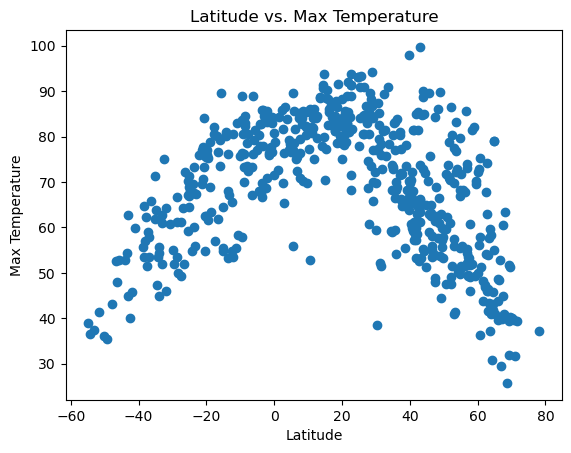

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

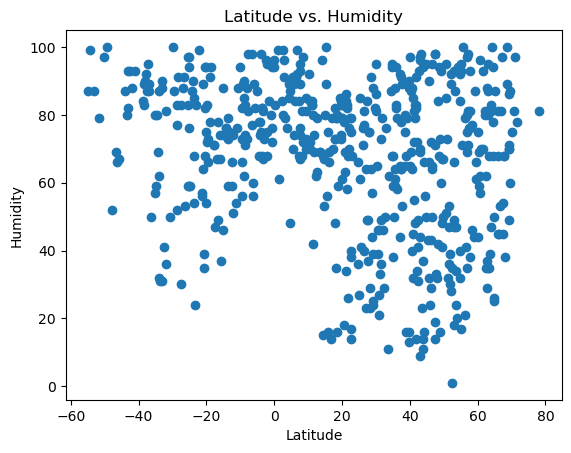

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])


# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

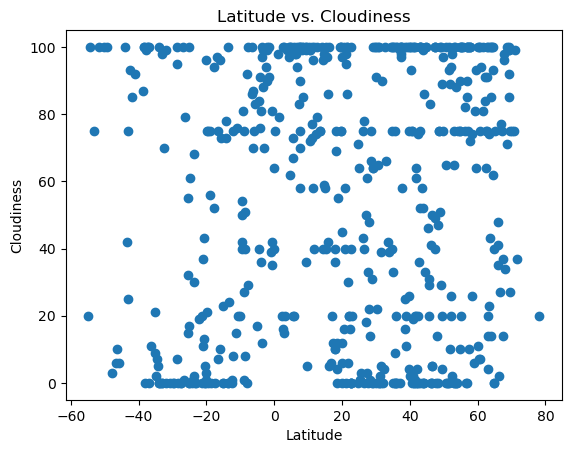

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])


# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

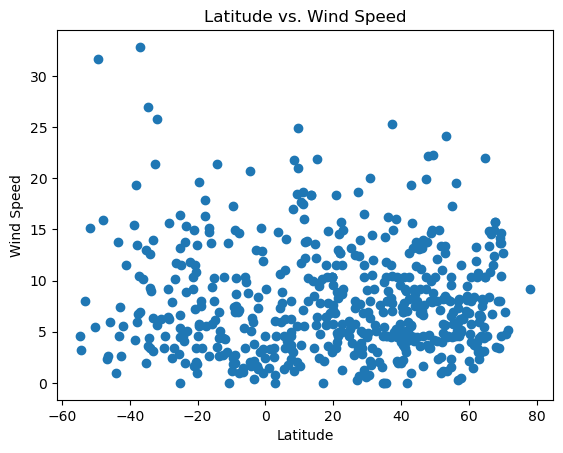

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])


# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
# Linear regression for latitude vs. temperature
slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
temperature_regression = slope * city_data_df["Lat"] + intercept

# Linear regression for latitude vs. humidity
slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df["Humidity"])
humidity_regression = slope * city_data_df["Lat"] + intercept

# Compute linear regression for latitude vs. cloudiness
slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df["Cloudiness"])
temperature_regression = slope * city_data_df["Lat"] + intercept

# Compute linear regression for latitude vs. Wind Speed
slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])
humidity_regression = slope * city_data_df["Lat"] + intercept

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,61.11,72,0,5.06,US,1686106134
2,hamilton,39.1834,-84.5333,68.23,79,100,1.99,US,1686106284
4,georgetown,5.4112,100.3354,89.53,70,20,4.61,MY,1686106199
5,sandy,40.5720,-111.8606,72.16,40,75,6.91,US,1686106199
7,patterson,37.4716,-121.1297,72.00,64,97,10.49,US,1686106325


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,38.86,87,20,4.61,AR,1686106282
3,adamstown,-25.0660,-130.1015,71.38,59,100,16.37,PN,1686106324
6,port-aux-francais,-49.3500,70.2167,35.33,100,100,31.68,TF,1686106325
9,nabire,-3.3667,135.4833,85.75,67,99,3.85,ID,1686106326
12,waitangi,-43.9535,-176.5597,52.83,87,100,1.01,NZ,1686106327


###  Temperature vs. Latitude Linear Regression Plot

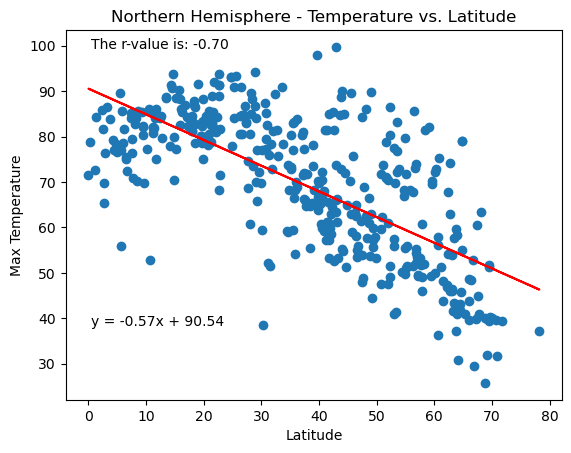

In [39]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])
regression_line = slope * northern_hemisphere_df["Lat"] + intercept
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])
plt.plot(northern_hemisphere_df["Lat"], regression_line, color="red")
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")


formula = f"y = {slope:.2f}x + {intercept:.2f}"
r_value = f"The r-value is: {r_value:.2f}"
plt.annotate(formula, (0.05, 0.2), xycoords="axes fraction")
plt.annotate(r_value, (0.05, 0.95), xycoords="axes fraction")



plt.show()
            

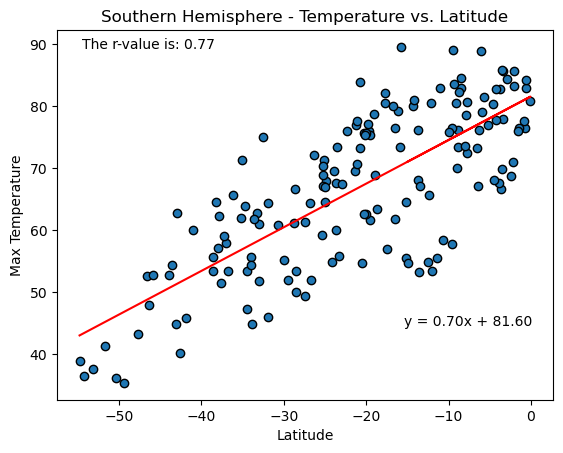

In [42]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regression_line = slope * southern_hemi_df["Lat"] + intercept
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolor="black")
plt.plot(southern_hemi_df["Lat"], regression_line, color="red")

plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
r_value = f"The r-value is: {r_value:.2f}"
plt.annotate(formula, (0.7, 0.2), xycoords="axes fraction")
plt.annotate(r_value, (0.05, 0.95), xycoords="axes fraction")

plt.show()

The r-values are relatively strong, (negative for northern hemi and positive for southerN) indicating that temperture goes up as you get closer to 0 latitude or the equator. 

### Humidity vs. Latitude Linear Regression Plot

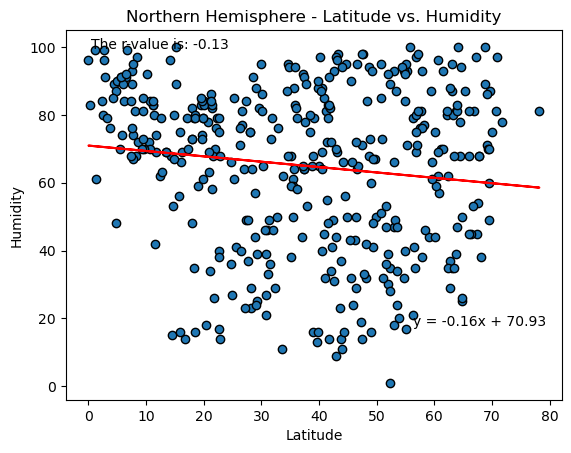

In [46]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])
regression_line = slope * northern_hemisphere_df["Lat"] + intercept
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], edgecolor="black")
plt.plot(northern_hemisphere_df["Lat"], regression_line, color="red")

plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
r_value = f"The r-value is: {r_value:.2f}"
plt.annotate(formula, (0.7, 0.2), xycoords="axes fraction")
plt.annotate(r_value, (0.05, 0.95), xycoords="axes fraction")

plt.show()

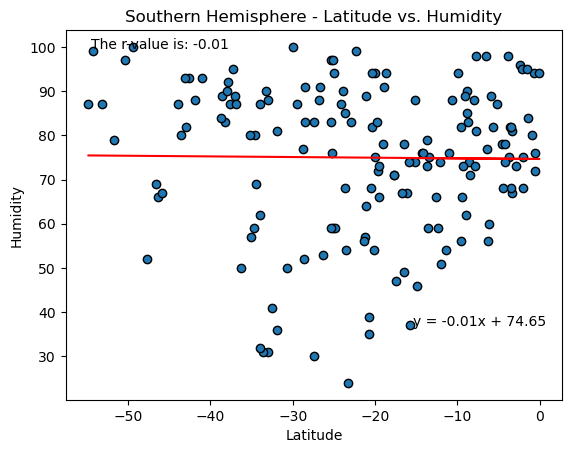

In [47]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regression_line = slope * southern_hemi_df["Lat"] + intercept
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolor="black")
plt.plot(southern_hemi_df["Lat"], regression_line, color="red")

plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
r_value = f"The r-value is: {r_value:.2f}"
plt.annotate(formula, (0.7, 0.2), xycoords="axes fraction")
plt.annotate(r_value, (0.05, 0.95), xycoords="axes fraction")

plt.show()

While there is no strong correlation, the negative r values suggest that as latitude increases, humidity tends to decrease in bothe hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

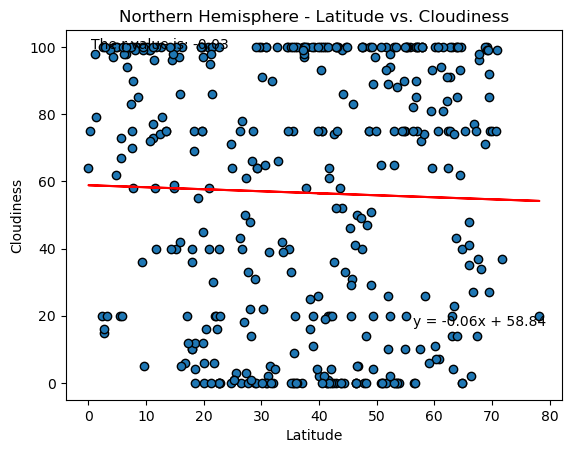

In [48]:
# Northern Hemisphere
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])
regression_line = slope * northern_hemisphere_df["Lat"] + intercept
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], edgecolor="black")
plt.plot(northern_hemisphere_df["Lat"], regression_line, color="red")

plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
r_value = f"The r-value is: {r_value:.2f}"
plt.annotate(formula, (0.7, 0.2), xycoords="axes fraction")
plt.annotate(r_value, (0.05, 0.95), xycoords="axes fraction")

plt.show()

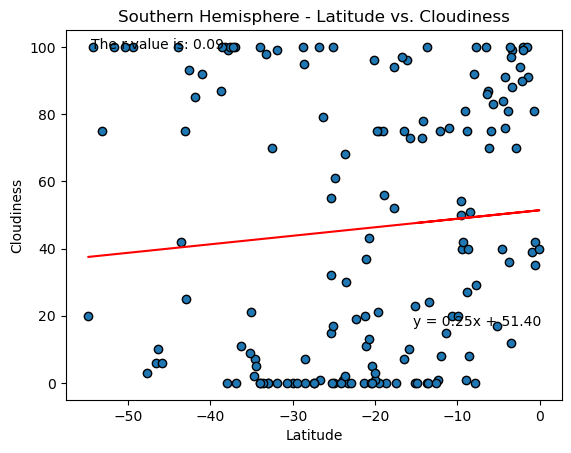

In [49]:
# Southern Hemisphere
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regression_line = slope * southern_hemi_df["Lat"] + intercept
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolor="black")
plt.plot(southern_hemi_df["Lat"], regression_line, color="red")

plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
r_value = f"The r-value is: {r_value:.2f}"
plt.annotate(formula, (0.7, 0.2), xycoords="axes fraction")
plt.annotate(r_value, (0.05, 0.95), xycoords="axes fraction")

plt.show()

both r-values are weak indicating little correlation. however, the negative r-value for the northern hemisphere and positive for the southern suggests cloudiness decreases as you get further from the equator.  

### Wind Speed vs. Latitude Linear Regression Plot

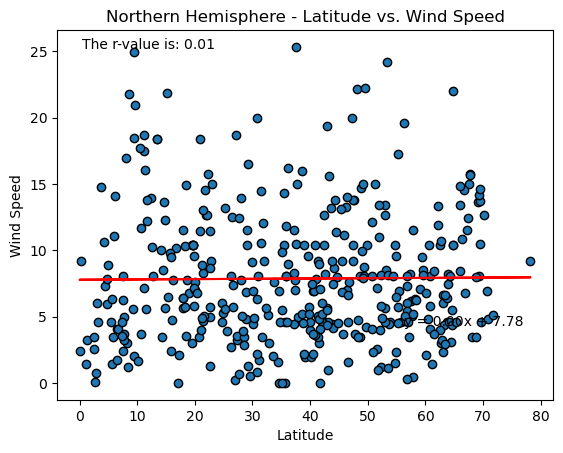

In [50]:
# Northern Hemisphere
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
regression_line = slope * northern_hemisphere_df["Lat"] + intercept
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], edgecolor="black")
plt.plot(northern_hemisphere_df["Lat"], regression_line, color="red")

plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
r_value = f"The r-value is: {r_value:.2f}"
plt.annotate(formula, (0.7, 0.2), xycoords="axes fraction")
plt.annotate(r_value, (0.05, 0.95), xycoords="axes fraction")

plt.show()

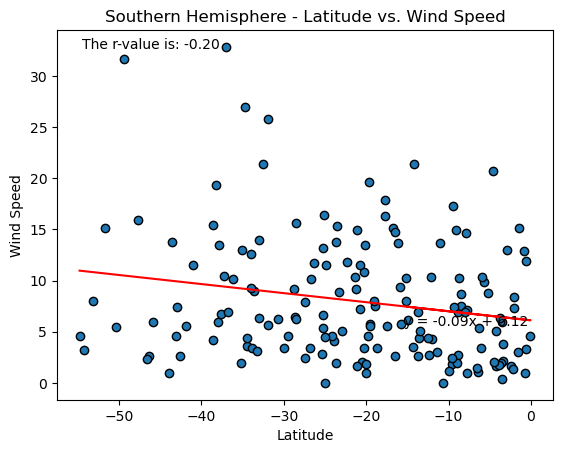

In [51]:
# Southern Hemisphere
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regression_line = slope * southern_hemi_df["Lat"] + intercept
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolor="black")
plt.plot(southern_hemi_df["Lat"], regression_line, color="red")

plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

formula = f"y = {slope:.2f}x + {intercept:.2f}"
r_value = f"The r-value is: {r_value:.2f}"
plt.annotate(formula, (0.7, 0.2), xycoords="axes fraction")
plt.annotate(r_value, (0.05, 0.95), xycoords="axes fraction")

plt.show()

both r-values are weak indicating little correlation. however, positive in the northern and negative in the southern suggest that wind speed increases as you get further from the equator.